In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(889, 12)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

- As the total 891 rows , In 'Cabin' there are more than 70% data is missing , so it is irrelevant to fill it
- Drop Cabin column

In [9]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
884     NaN
885     B42
886     NaN
887    C148
888     NaN
Name: Cabin, Length: 889, dtype: object

In [10]:
df.shape

(889, 11)

<AxesSubplot:ylabel='Frequency'>

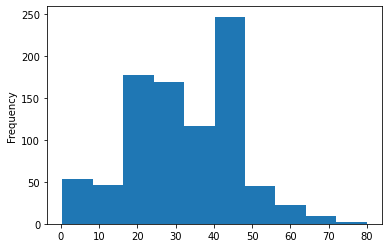

In [11]:
df['Age'].plot.hist()

- as Curve is Bell Shaped , so fill the missing values by Mean

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

+ Embarked column is categorical so calculating the mode and filling it

In [13]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- We observe that max people are from S-southampton so we fill all with S

In [14]:
df["Embarked"].fillna(value='S',inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- As the name column contain different name and the survival is not relevant to names
- passenger Id does not make any sense
- Ticket number doesnt provide any relevant information whether they survived or not so drop it

In [16]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


- Label Encoding it encode the value as per given instance
- Eg- columns has 3 category C/S/Q--it will form label suppose 0-C, 1-S, 2-Q

In [19]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [21]:
eda =  pd.read_csv('train.csv')

In [22]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


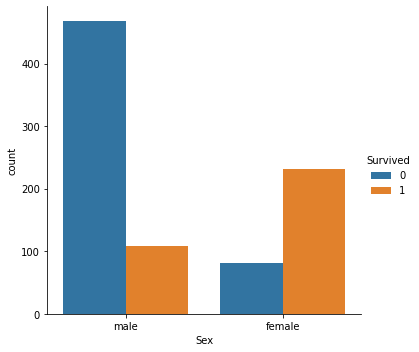

In [23]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = eda)

### Inference:
Just by observing the graph, it can be approximated that:

- The survival rate of men is around 20% and that of women is around 75%.

Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

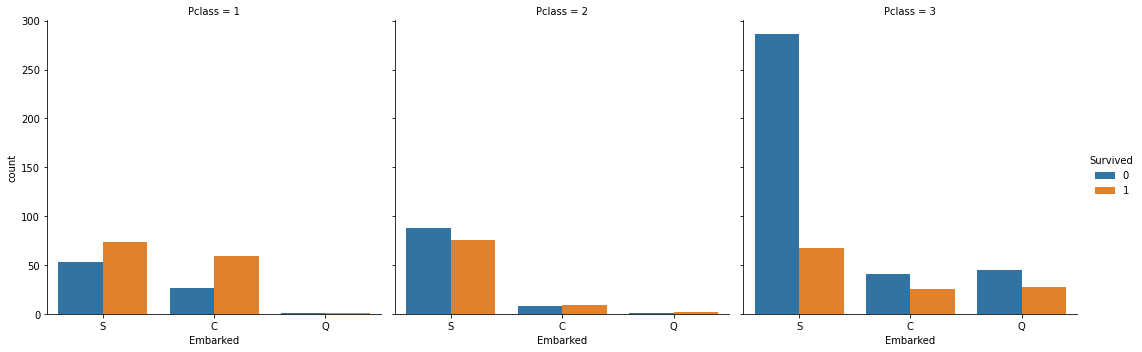

In [24]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data =eda)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

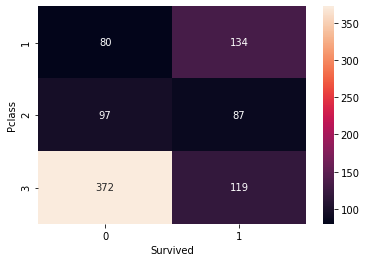

In [25]:
# Group the dataset by Pclass and Survived and then unstack them 

group = eda.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 

# Heatmap - Color encoded 2D representation of data. 

sns.heatmap(pclass_survived, annot = True, fmt ="d")

### Inference

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa.

- Class 1 passengers have a higher survival chance compared to classes 2 and 3.

It implies that Pclass contributes a lot to a passenger’s survival rate.



## Naive Bayes

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import * 
from sklearn.metrics import accuracy_score, confusion_matrix

#### Training & Predicting Accuracy, Confusion Matrix of the model using Naive Bayes
- Naive Bayes is used to classify Record with the help of Probability
- As we Know, Naive Bayes is only applicable for Categorical variables.
- Only for Categorical Variables we are predicting Accuracy and Confusion Matrix :

Categorical Columns are: Survived, Pclass, Sex, SibSp, Parch, Embarked

In [45]:
def Nav_Model(col):
    x = df.drop([col], axis=1)
    y = df[col]
    llist = df.columns.to_list()
    llist.remove(col)
    print('Dependent Variable:', col)
    print('\nIndependent Variables:', *llist)
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = 42)
    model = BernoulliNB()
    model.fit(train_x, train_y)
    ypred = model.predict(test_x)
    print("==================================================================")
    print(f"Accuracy score is {accuracy_score(test_y, ypred)}")
    print("==================================================================")
    print(f"Confusion Matrix: \n{confusion_matrix(test_y, ypred)}")
    print("==================================================================")
    print(f'\n\nThe accuracy of the model for predicting "{col}" for unseen data is {round(accuracy_score(test_y, ypred, normalize=True)*100, 2)}%')

In [46]:
Nav_Model('Pclass')

Dependent Variable: Pclass

Independent Variables: Survived Sex Age SibSp Parch Fare Embarked
Accuracy score is 0.5786516853932584
Confusion Matrix: 
[[15 10 19]
 [ 0  8 34]
 [ 6  6 80]]


The accuracy of the model for predicting "Pclass" for unseen data is 57.87%


In [47]:
Nav_Model('SibSp')

Dependent Variable: SibSp

Independent Variables: Survived Pclass Sex Age Parch Fare Embarked
Accuracy score is 0.6910112359550562
Confusion Matrix: 
[[108  17   0   0   0   0]
 [ 28  15   0   0   0   0]
 [  3   2   0   0   0   0]
 [  1   1   0   0   0   0]
 [  1   1   0   0   0   0]
 [  0   1   0   0   0   0]]


The accuracy of the model for predicting "SibSp" for unseen data is 69.1%


In [48]:
Nav_Model('Sex')

Dependent Variable: Sex

Independent Variables: Survived Pclass Age SibSp Parch Fare Embarked
Accuracy score is 0.797752808988764
Confusion Matrix: 
[[53 20]
 [16 89]]


The accuracy of the model for predicting "Sex" for unseen data is 79.78%


In [49]:
Nav_Model('Parch')

Dependent Variable: Parch

Independent Variables: Survived Pclass Sex Age SibSp Fare Embarked
Accuracy score is 0.6966292134831461
Confusion Matrix: 
[[118  15   0   0   0]
 [ 24   6   0   0   0]
 [ 10   2   0   0   0]
 [  1   0   0   0   0]
 [  1   1   0   0   0]]


The accuracy of the model for predicting "Parch" for unseen data is 69.66%


In [50]:
Nav_Model('Embarked')

Dependent Variable: Embarked

Independent Variables: Survived Pclass Sex Age SibSp Parch Fare
Accuracy score is 0.7303370786516854
Confusion Matrix: 
[[  0   0  36]
 [  0   0  12]
 [  0   0 130]]


The accuracy of the model for predicting "Embarked" for unseen data is 73.03%


In [51]:
Nav_Model('Survived')

Dependent Variable: Survived

Independent Variables: Pclass Sex Age SibSp Parch Fare Embarked
Accuracy score is 0.7865168539325843
Confusion Matrix: 
[[87 22]
 [16 53]]


The accuracy of the model for predicting "Survived" for unseen data is 78.65%


- The Survived Column and Gender column has nearly same accuracy score
- The Parch and SibSp columns has same accuracy score
- Pclass has the least accuracy